# XYZ CORPATION LOAN DEFAULTERS PREDICTION 

## Script By

Rachit Agarwal https://www.linkedin.com/in/rac05

### ABSTRACT
The main income earning assets for a bank are loans. A bank’s profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. By predicting the loan defaulters, the bank can reduce its NonPerforming Loans. A very important approach in predictive analytics is used to study the problem of predicting loan defaulters.

## IMPORTING REQUIRED LIBRARIES 

In [1]:
# Libraries used for Data loading, Cleaning and Visualization 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Libraries used for preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Libraries used for creating models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

# Libraries used for model evaluation
from sklearn.metrics \
import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc

# Library used to save the model object
from pickle import dump

# Library to calculate the execution time
import time

## EXPLORATORY DATA ANALYSIS (EDA)
## LOADING THE DATA 

In [2]:
data = pd.read_csv('data.csv', low_memory = False, index_col = 0)
data1 = data.copy()
data1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
data1.shape

(855969, 72)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 1077501 to 36271262
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    855969 non-null  int64  
 1   loan_amnt                    855969 non-null  int64  
 2   funded_amnt                  855969 non-null  int64  
 3   funded_amnt_inv              855969 non-null  float64
 4   term                         855969 non-null  object 
 5   int_rate                     855969 non-null  float64
 6   installment                  855969 non-null  float64
 7   grade                        855969 non-null  object 
 8   sub_grade                    855969 non-null  object 
 9   emp_title                    806526 non-null  object 
 10  emp_length                   812908 non-null  object 
 11  home_ownership               855969 non-null  object 
 12  annual_inc                   855969 non-null  floa

In [5]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
member_id,855969.0,3.476269e+07,2.399418e+07,70699.00,10792732.00,36975319.00,5.803559e+07,7.351969e+07
loan_amnt,855969.0,1.474557e+04,8.425340e+03,500.00,8000.00,13000.00,2.000000e+04,3.500000e+04
funded_amnt,855969.0,1.473238e+04,8.419472e+03,500.00,8000.00,13000.00,2.000000e+04,3.500000e+04
funded_amnt_inv,855969.0,1.470006e+04,8.425805e+03,0.00,8000.00,13000.00,2.000000e+04,3.500000e+04
int_rate,855969.0,1.319232e+01,4.368365e+00,5.32,9.99,12.99,1.599000e+01,2.899000e+01
installment,855969.0,4.362381e+02,2.437269e+02,15.69,260.55,382.55,5.715600e+02,1.445460e+03
annual_inc,855969.0,7.507119e+04,6.426447e+04,0.00,45000.00,65000.00,9.000000e+04,9.500000e+06
dti,855969.0,1.812216e+01,1.742363e+01,0.00,11.88,17.61,2.390000e+01,9.999000e+03
delinq_2yrs,855969.0,3.116211e-01,8.571894e-01,0.00,0.00,0.00,0.000000e+00,3.900000e+01
inq_last_6mths,855969.0,6.809148e-01,9.640331e-01,0.00,0.00,0.00,1.000000e+00,8.000000e+00


In [6]:
data1.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt'

## DATA CLEANING 

### 1. Renaming Variables

In [7]:
# Renaming the variables

renamed_variables = ['member_id','loan_amount','approved_amount_bank','approved_amount_investor','term','interest_rate',
                    'emi','grade','sub_grade','emp_title','emp_length','home_ownership','inc_borrower','verification_status',
                    'issue_date','payment_plan','desc','purpose','title','zip_code','state_code','ratio_inc_exp_borrower',
                    'delinq_2yrs','first_credit','enquires_by_creditors','month_since_last_delinq','months_since_last_record',
                    'open_credit_lines','no._of_negative_factors','revolving_balance','revol_util','total_credit_lines',
                    'initial_loan_type','outstndg_principal_amount','outstndg_principal_amount_investor','total_amount_paid',
                    'total_amount_paid_invt','prncp_amount_recovered','interest_amount_paid','late_fee', 'add_charges',
                    'penalty_fee','last_payment_date','last_amount_paid','next_payment_date', 'credit_report',
                    'collections_within_12months','month_since_last_major_derog','policy_code','application_type',
                    'inc_joint','ratio_inc_exp_joint','verified_status_joint','acc_now_delinq','total_collection',
                    'total_current_bal', 'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','months_since_rcnt_il',
                    'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim',
                    'Inq_fi','total_cu_tl','inq_last_12m','default']

data1.columns = renamed_variables
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 1077501 to 36271262
Data columns (total 72 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   member_id                           855969 non-null  int64  
 1   loan_amount                         855969 non-null  int64  
 2   approved_amount_bank                855969 non-null  int64  
 3   approved_amount_investor            855969 non-null  float64
 4   term                                855969 non-null  object 
 5   interest_rate                       855969 non-null  float64
 6   emi                                 855969 non-null  float64
 7   grade                               855969 non-null  object 
 8   sub_grade                           855969 non-null  object 
 9   emp_title                           806526 non-null  object 
 10  emp_length                          812908 non-null  object 
 11  home_ownership    

In [8]:
data1.columns

Index(['member_id', 'loan_amount', 'approved_amount_bank',
       'approved_amount_investor', 'term', 'interest_rate', 'emi', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'inc_borrower', 'verification_status', 'issue_date', 'payment_plan',
       'desc', 'purpose', 'title', 'zip_code', 'state_code',
       'ratio_inc_exp_borrower', 'delinq_2yrs', 'first_credit',
       'enquires_by_creditors', 'month_since_last_delinq',
       'months_since_last_record', 'open_credit_lines',
       'no._of_negative_factors', 'revolving_balance', 'revol_util',
       'total_credit_lines', 'initial_loan_type', 'outstndg_principal_amount',
       'outstndg_principal_amount_investor', 'total_amount_paid',
       'total_amount_paid_invt', 'prncp_amount_recovered',
       'interest_amount_paid', 'late_fee', 'add_charges', 'penalty_fee',
       'last_payment_date', 'last_amount_paid', 'next_payment_date',
       'credit_report', 'collections_within_12months',
       'month_

### 2. Extracting Values 

In [9]:
# Extracting the number from the string value
# e.g '10+ years' is converted to 10

data1['emp_length'] = data1['emp_length'].str.split(' ').str[0]
#print(data1['emp_length'].value_counts())

# Replacing the values
# '10+' -> 10
# '<' -> 0

data1['emp_length'].loc[data1['emp_length'] == '10+'] = 10
data1['emp_length'].loc[data1['emp_length'] == '<'] = 0
data1['emp_length'].value_counts()

10    282090
2      75986
0      67597
3      67392
1      54855
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

In [10]:
# Extracting the number from the string value
# e.g ' 36 months' -> 36

#data1['term'].value_counts()
data1['term'] = data1['term'].str.split(' ').str[1]
data1['term'].value_counts()

36    600221
60    255748
Name: term, dtype: int64

In [11]:
# extracting the month and year value for each date variable
# e.g '01-02-1985' (dd-mm-yyyy) -> month -> 2
#                                  year -> 1985


dv = ['first_credit','issue_date','credit_report','last_payment_date','next_payment_date']

for i in dv:
    data1[i] = pd.to_datetime(data1[i], format = '%d-%m-%Y')
    a = i+'_month'
    b = i+'_year'
    data1[a] = data1[i].apply(lambda date : date.month)
    data1[b] = data1[i].apply(lambda date : date.year)


# dropping the original date columns except for 'issue_date'

dv.remove('issue_date') 
data1.drop(dv, axis = 1, inplace = True)

### 3. Replacing Values
#### Replacing the income value of borrower with co-borrower on basis of application type
if application_type = 'INDIVIDUAL' then income of borrower will remain as it is.


and if application_type = 'JOINT' then income value of borrower is replaced with income value of joint.


where income of joint is the combined income value of borrower and co-borrower.

same is for dti/ratio_inc_exp_borrower and dti_joint/ratio_inc_exp_joint.

In [12]:
# extracting the index value where application_type is JOINT
a = data1[data1['application_type'] == 'JOINT'].index

for i in a:
    data1.loc[i,'inc_borrower'] = data1.loc[i]['inc_joint']
    data1.loc[i,'ratio_inc_exp_borrower'] = data1.loc[i]['ratio_inc_exp_joint']
    #print(i,'',data1.loc[i]['inc_joint'],'',data1.loc[i]['inc_borrower'])
    
#print(a)

# dropping the original columns

data1.drop(['inc_joint','ratio_inc_exp_joint'], axis = 1, inplace = True)
data1.shape

(855969, 76)

#### Replacing the values in the home_ownership variable
Replacing 'OTHER', 'ANY' & ''NONE' values with ''OTHER

In [13]:
data1['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [14]:
a = data1[(data1['home_ownership'] == 'OTHER') | (data1['home_ownership'] == 'NONE') |(data1['home_ownership'] == 'ANY')].index

for i in a:
    data1.loc[i,'home_ownership'] = 'OTHER'
    
data1['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          192
Name: home_ownership, dtype: int64

## PRE-PROCESSING
### 1. Dropping the Variables 
#### Dropping those variables which are not needed for preparing the model 

In [15]:
# Dropping the following variables
# member_id -> Every value is unique 
# emp_title, desc, title, zip_code, sub_grade -> Not needed for model analysis
# policy_code -> Every value is 1

drop_var = ['member_id','emp_title','desc','title','zip_code','policy_code','sub_grade']

data1.drop(drop_var, axis = 1, inplace = True)
data1.shape

(855969, 69)

#### Dropping those variables which contain more than 50% null values

In [16]:
# Preparing the list of variables with more than 50% null values 

a = data1.isnull().sum().sort_values(ascending = False)/len(data1)
b = a[a > 0.5].index
b

Index(['verified_status_joint', 'il_util', 'months_since_rcnt_il',
       'open_il_12m', 'all_util', 'open_acc_6m', 'open_il_6m', 'open_il_24m',
       'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'inq_last_12m',
       'total_cu_tl', 'Inq_fi', 'max_bal_bc', 'months_since_last_record',
       'month_since_last_major_derog', 'month_since_last_delinq'],
      dtype='object')

In [17]:
data1 = data1.drop(b, axis = 1)
a1 = data1.isnull().sum().sort_values(ascending = False)
a1[a1 > 0]

next_payment_date_year         252971
next_payment_date_month        252971
total_rev_hi_lim                67313
total_collection                67313
total_current_bal               67313
emp_length                      43061
last_payment_date_month          8862
last_payment_date_year           8862
revol_util                        446
collections_within_12months        56
credit_report_month                50
credit_report_year                 50
dtype: int64

### 2. Computing the Missing Values
Filling the missing values with zero

In [18]:
for i in a1.index:
    data1[i].fillna(0, inplace = True)
    
data1.isnull().sum()

loan_amount                           0
approved_amount_bank                  0
approved_amount_investor              0
term                                  0
interest_rate                         0
emi                                   0
grade                                 0
emp_length                            0
home_ownership                        0
inc_borrower                          0
verification_status                   0
issue_date                            0
payment_plan                          0
purpose                               0
state_code                            0
ratio_inc_exp_borrower                0
delinq_2yrs                           0
enquires_by_creditors                 0
open_credit_lines                     0
no._of_negative_factors               0
revolving_balance                     0
revol_util                            0
total_credit_lines                    0
initial_loan_type                     0
outstndg_principal_amount             0


### 3. Changing the DataType
#### Changing the datatype from float/Object to int of the below mentioned variables

In [19]:
l = ['term','emp_length','credit_report_month','credit_report_year','last_payment_date_month',
     'last_payment_date_year','next_payment_date_month','next_payment_date_year']
for i in l:
    data1[i] = data1[i].astype('int')

### 4. Checking for Multi-Collinearity 

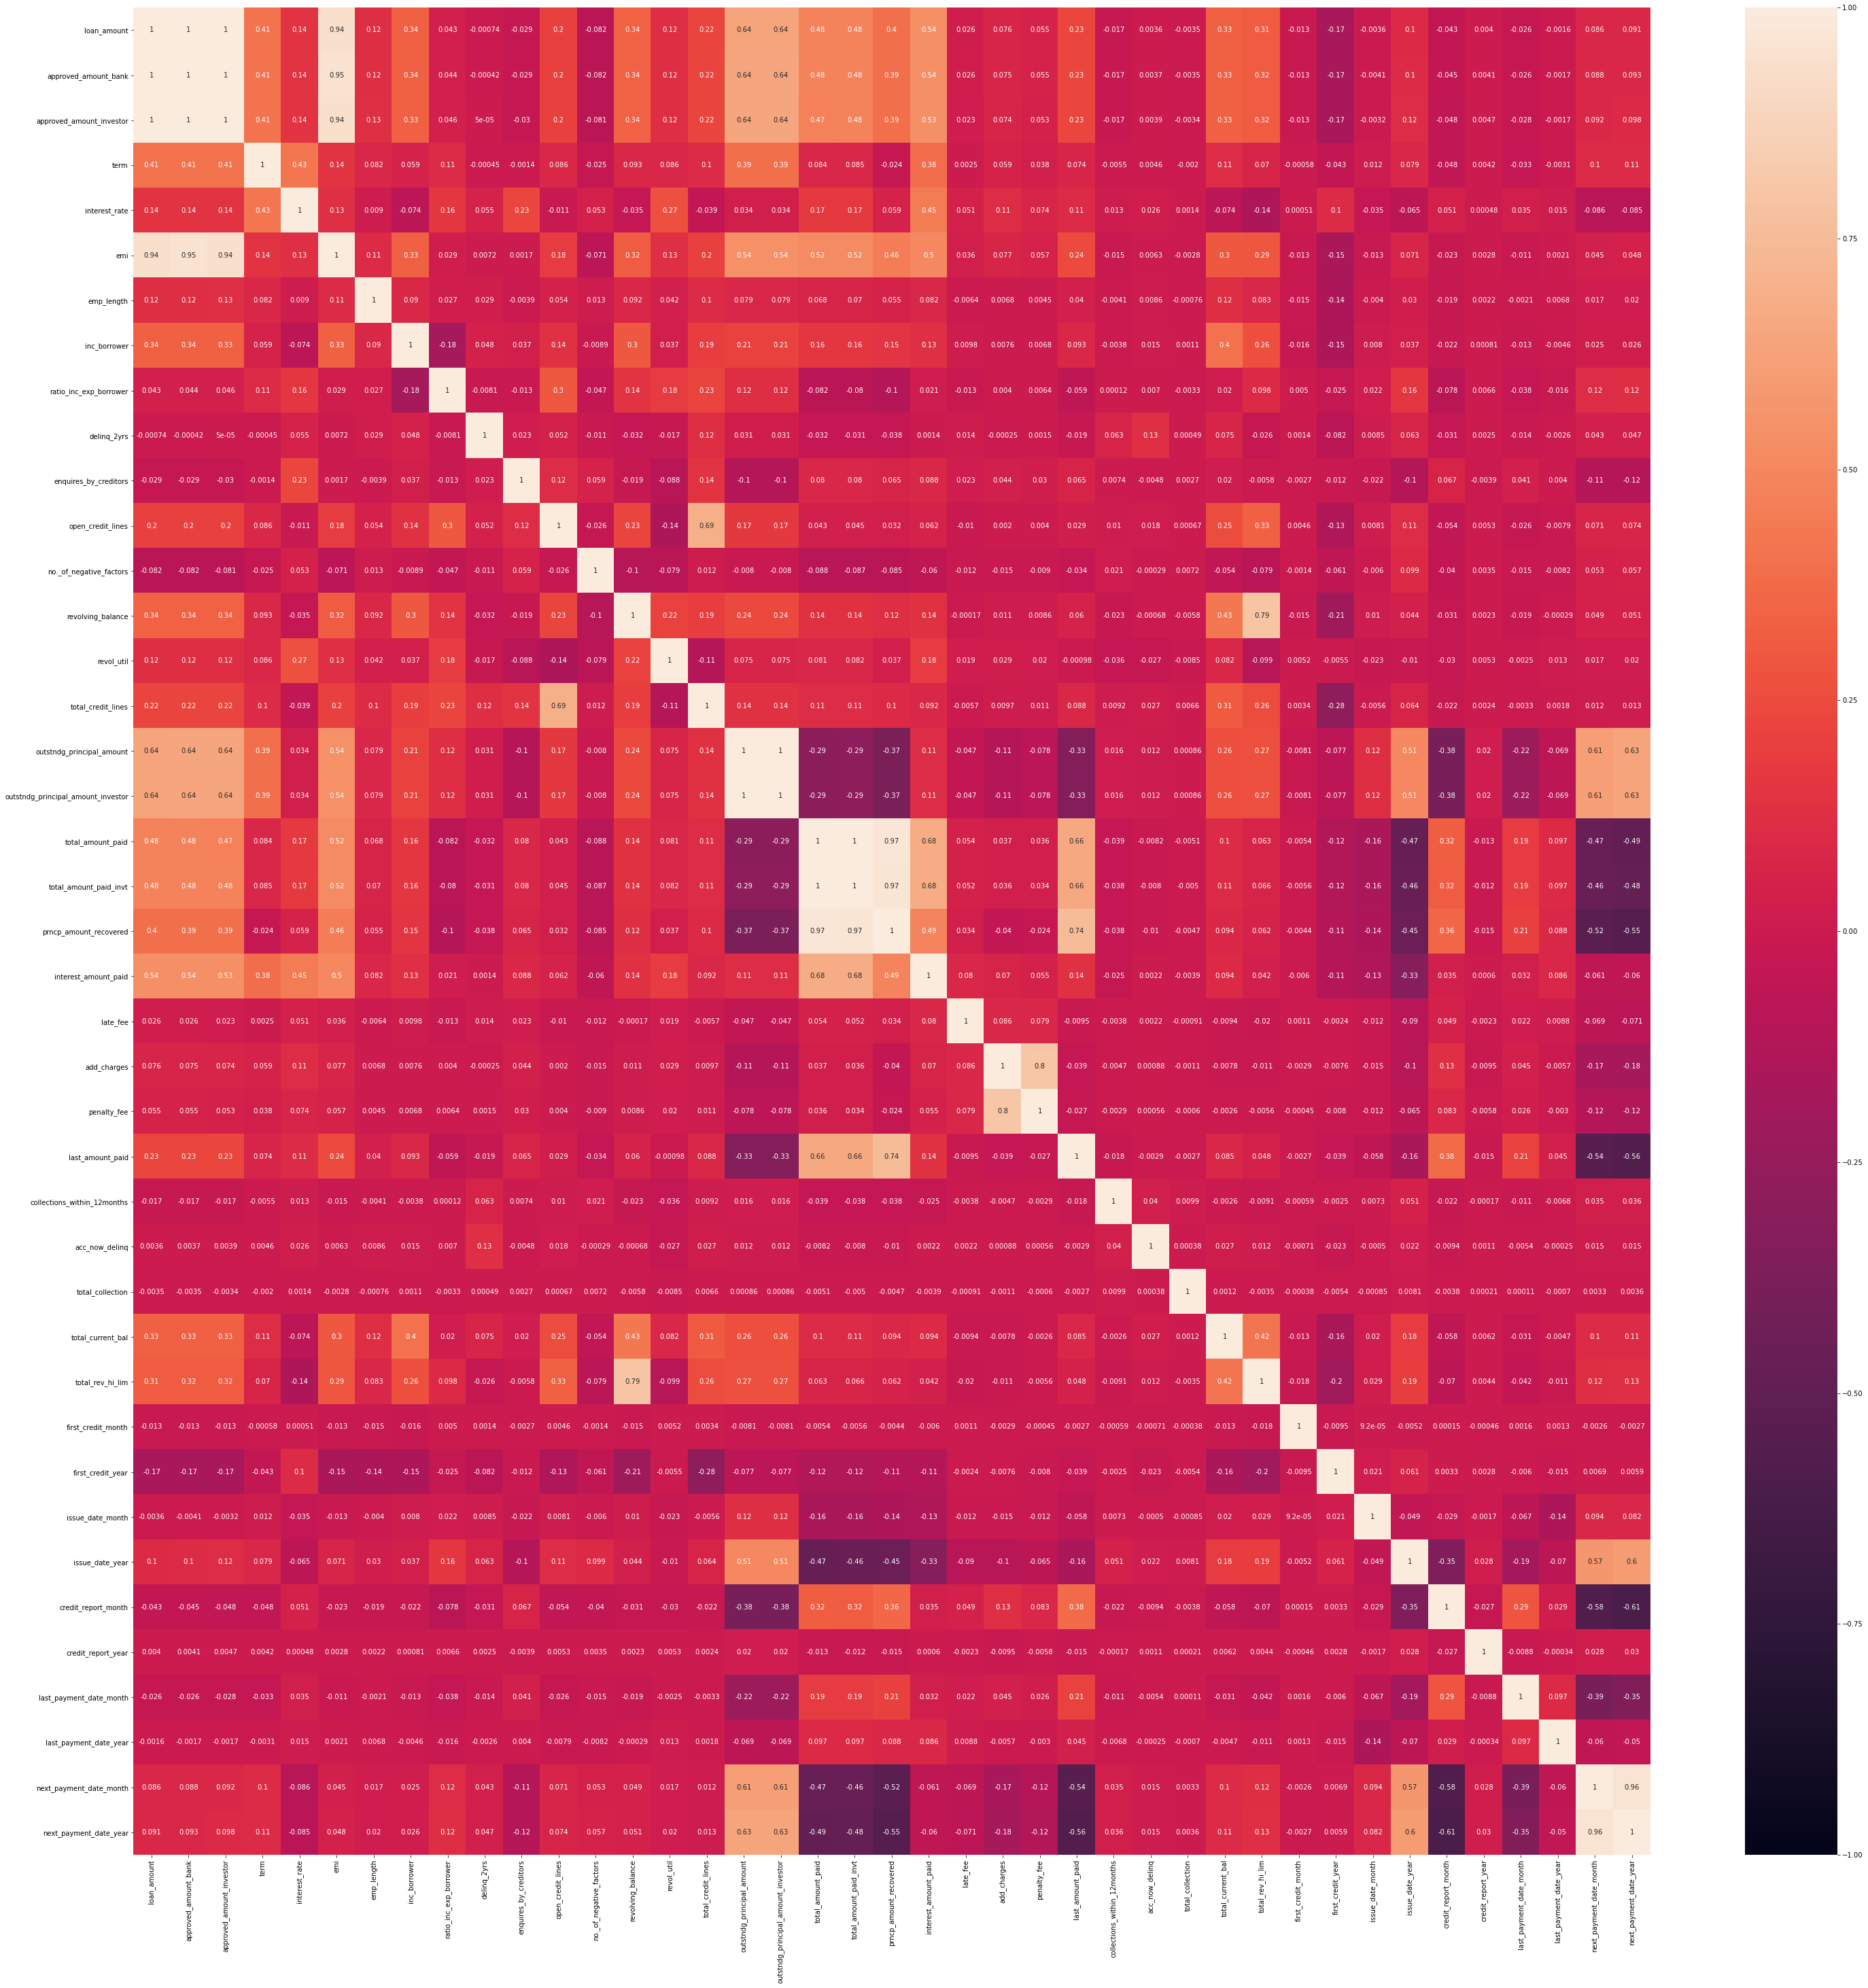

In [20]:
X = data1.drop('default', axis = 1).corr()

plt.figure(figsize = (50,50))
sns.heatmap(X, vmin = -1.0, vmax = 1.0, annot = True)

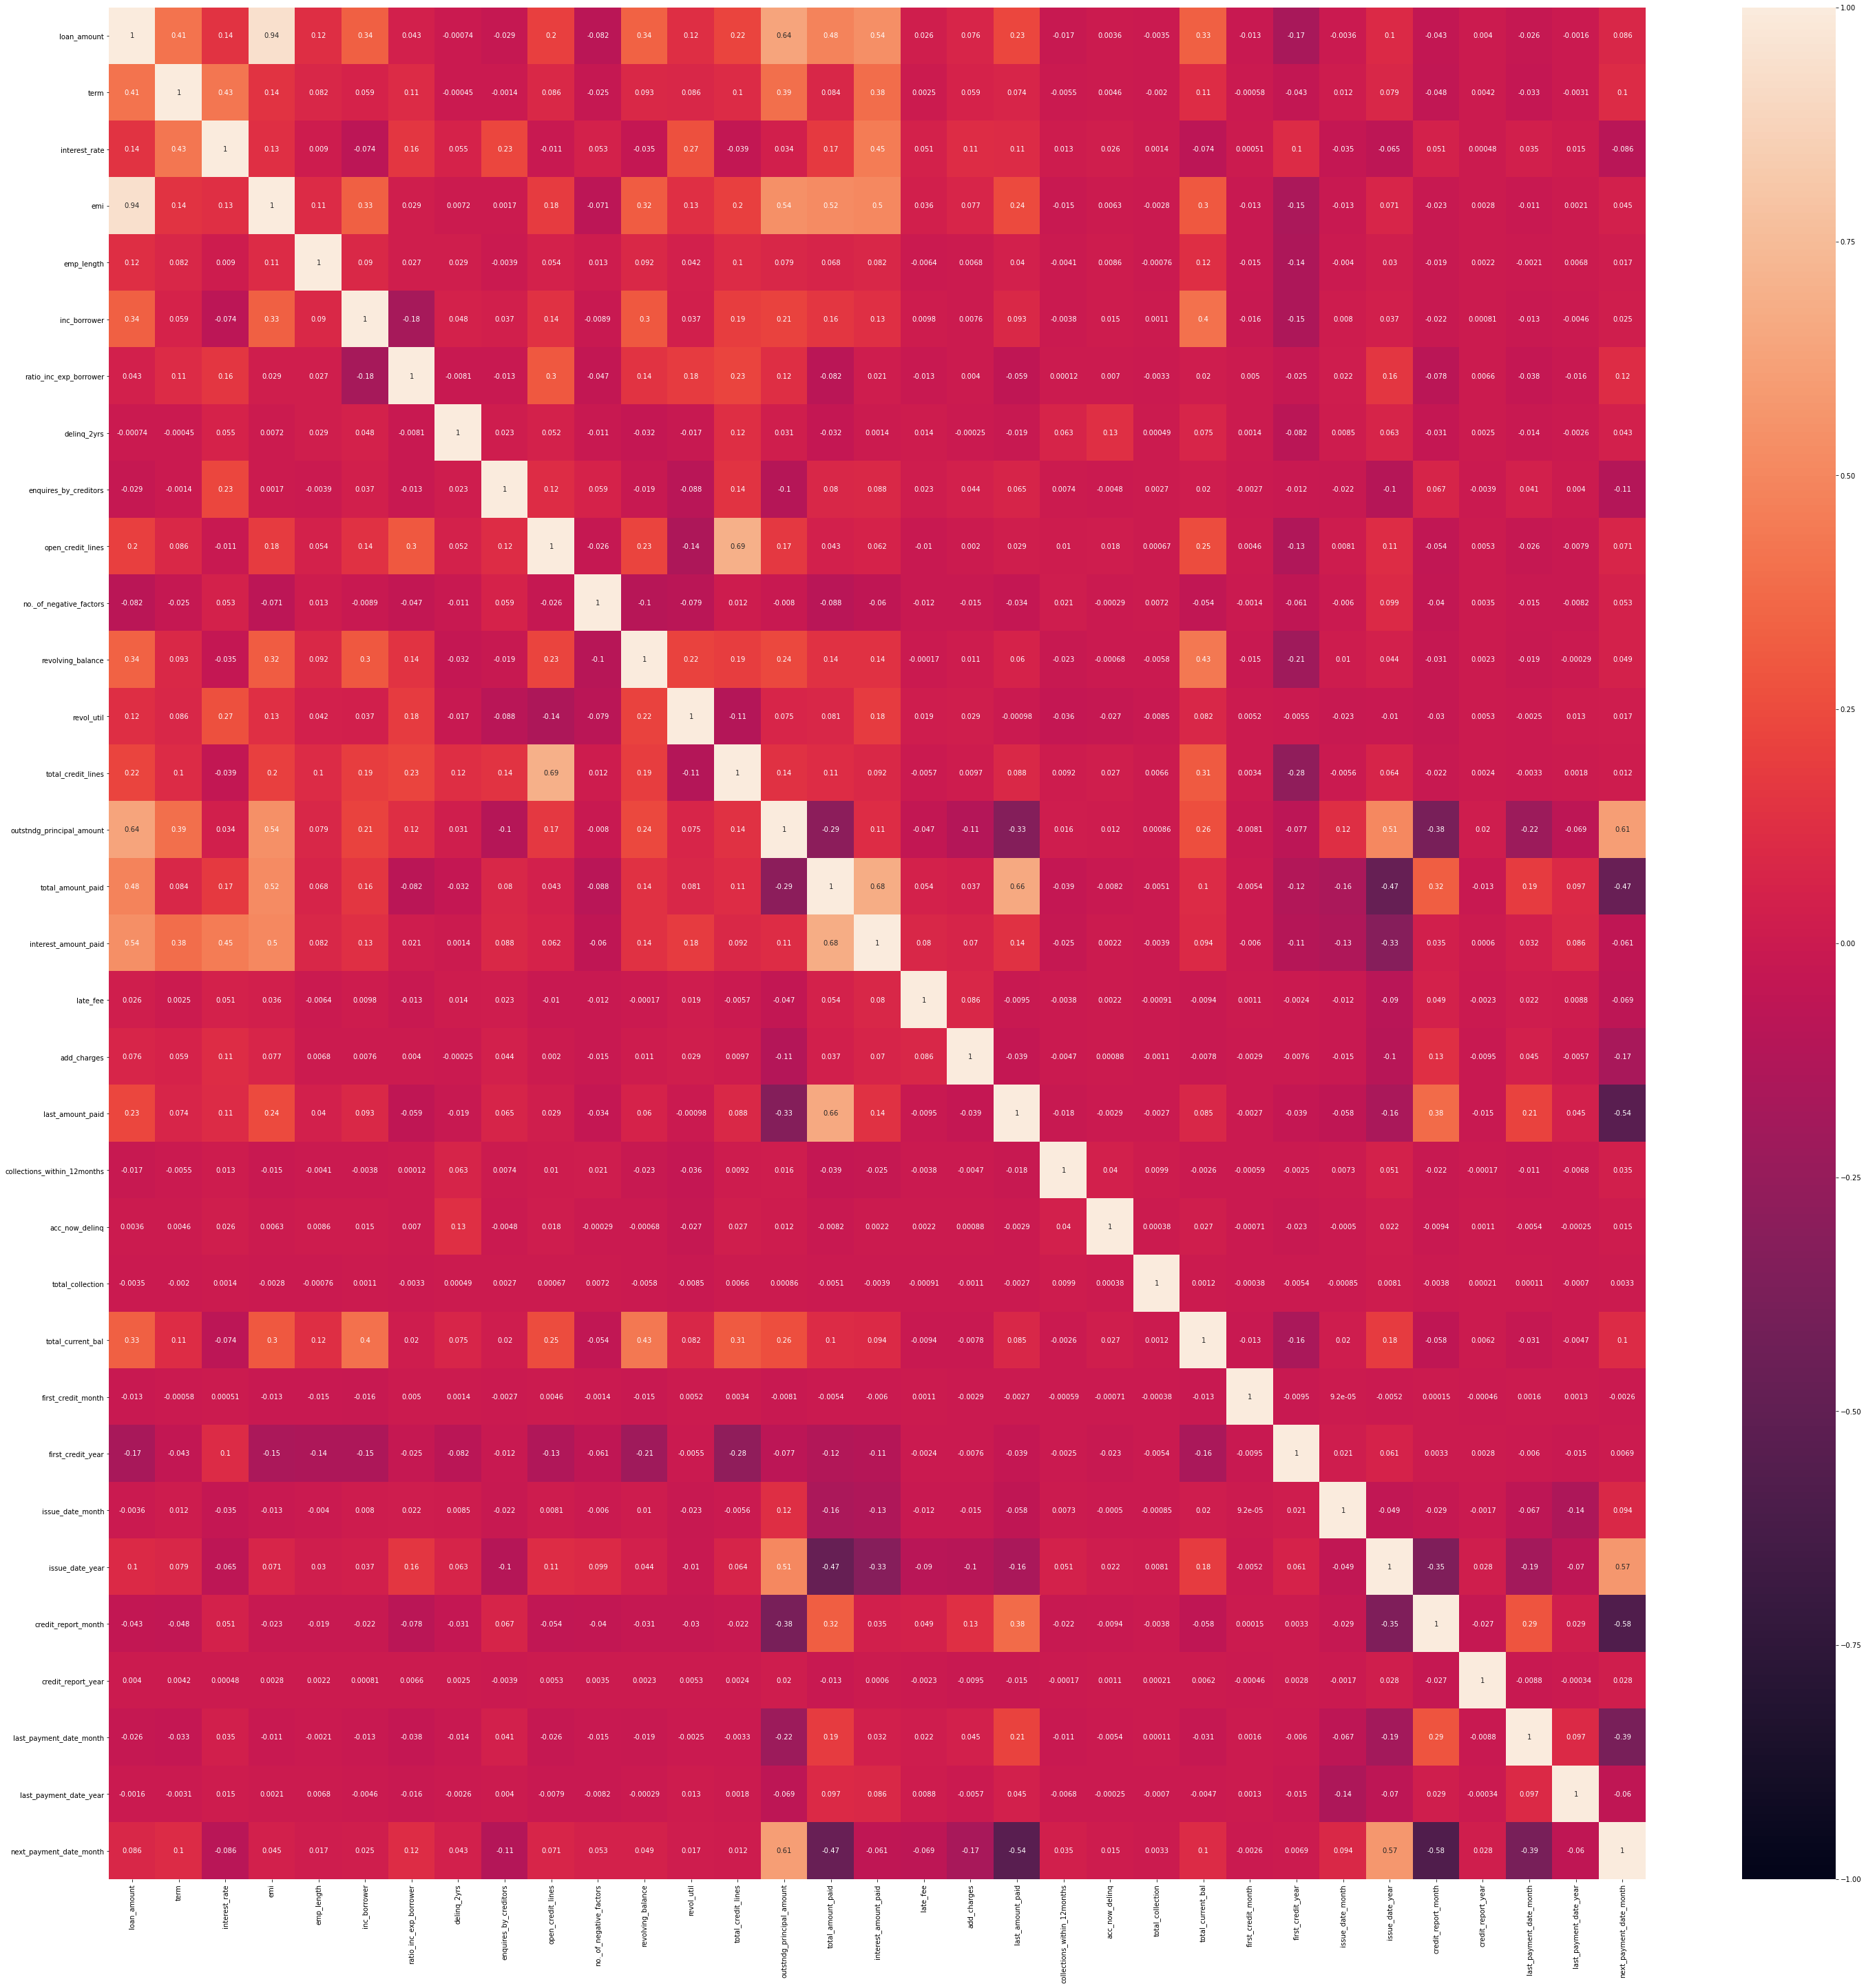

In [21]:
# Removing the variables with value > 0.7

var_drop = ['approved_amount_bank','approved_amount_investor','outstndg_principal_amount_investor','total_amount_paid_invt',
            'prncp_amount_recovered','next_payment_date_year','penalty_fee','total_rev_hi_lim']

data1.drop(var_drop, axis = 1, inplace = True)

X1 = data1.drop('default', axis = 1).corr()
plt.figure(figsize = (50,50))
sns.heatmap(X1, vmin = -1.0, vmax = 1.0, annot = True)

In [22]:
data1.shape

(855969, 43)

### 5. Rearranging the columns 

In [23]:
l = ['loan_amount', 'term', 'interest_rate', 'emi', 'grade',
     'emp_length', 'home_ownership', 'inc_borrower', 'verification_status',
     'issue_date', 'payment_plan', 'purpose', 'state_code',
     'ratio_inc_exp_borrower', 'delinq_2yrs', 'enquires_by_creditors',
     'open_credit_lines', 'no._of_negative_factors', 'revolving_balance',
     'revol_util', 'total_credit_lines', 'initial_loan_type',
     'outstndg_principal_amount', 'total_amount_paid',
     'interest_amount_paid', 'late_fee', 'add_charges', 'last_amount_paid',
     'collections_within_12months', 'application_type', 'acc_now_delinq',
     'total_collection', 'total_current_bal',
     'first_credit_month', 'first_credit_year', 'issue_date_month',
     'issue_date_year', 'credit_report_month', 'credit_report_year',
     'last_payment_date_month', 'last_payment_date_year',
     'next_payment_date_month','default']

data2 = data1[l]
data2.head()

,loan_amount,term,interest_rate,emi,grade,emp_length,home_ownership,inc_borrower,verification_status,issue_date,...,first_credit_month,first_credit_year,issue_date_month,issue_date_year,credit_report_month,credit_report_year,last_payment_date_month,last_payment_date_year,next_payment_date_month,default
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,36,10.65,162.87,B,10,RENT,24000.0,Verified,2011-12-01,...,1,1985,12,2011,1,2016,1,2015,0,0
1077430,2500,60,15.27,59.83,C,0,RENT,30000.0,Source Verified,2011-12-01,...,4,1999,12,2011,9,2013,4,2013,0,1
1077175,2400,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,2011-12-01,...,11,2001,12,2011,1,2016,6,2014,0,0
1076863,10000,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,2011-12-01,...,2,1996,12,2011,1,2015,1,2015,0,0
1075358,3000,60,12.69,67.79,B,1,RENT,80000.0,Source Verified,2011-12-01,...,1,1996,12,2011,1,2016,1,2016,2,0


In [24]:
data2.shape

(855969, 43)

In [25]:
path = 'New_processed_data.csv'
data2.to_csv(path)

### 6. Applying Label Encoder 

In [26]:
# Extracting the column names where datatype is object

col = []

for i in data2.columns[:-1]:
    if data2[i].dtype == 'object':
        col.append(i)
        
col

['grade',
 'home_ownership',
 'verification_status',
 'payment_plan',
 'purpose',
 'state_code',
 'initial_loan_type',
 'application_type']

In [27]:
data2[col].head()

,grade,home_ownership,verification_status,payment_plan,purpose,state_code,initial_loan_type,application_type
id,,,,,,,,
1077501,B,RENT,Verified,n,credit_card,AZ,f,INDIVIDUAL
1077430,C,RENT,Source Verified,n,car,GA,f,INDIVIDUAL
1077175,C,RENT,Not Verified,n,small_business,IL,f,INDIVIDUAL
1076863,C,RENT,Source Verified,n,other,CA,f,INDIVIDUAL
1075358,B,RENT,Source Verified,n,other,OR,f,INDIVIDUAL


In [28]:
# Applying the Label Encoder to the categorical data

label_encd = LabelEncoder()
unique_val = []

for i in col:
    label_encd.fit(data2[i])
    unique_val.append(label_encd.classes_)
    data2[i] = label_encd.transform(data2[i])


In [29]:
data2[col].head()

,grade,home_ownership,verification_status,payment_plan,purpose,state_code,initial_loan_type,application_type
id,,,,,,,,
1077501,1,3,2,0,1,3,0,0
1077430,2,3,1,0,0,10,0,0
1077175,2,3,0,0,11,14,0,0
1076863,2,3,1,0,9,4,0,0
1075358,1,3,1,0,9,37,0,0


### 7. Train Test Split 

In [30]:
# splitting the data into train and test data on issue_date variable
# training data  -> June 2007 to May 2015
# testing data ->  June 2015 to Dec 2015

train = data2[(data2['issue_date'] >= '2007-06-01') & (data2['issue_date'] <= '2015-05-01')]
test = data2[(data2['issue_date'] >= '2015-06-01') & (data2['issue_date'] <= '2015-12-01')]

In [31]:
# dropping the some variables

drop_var = ['issue_date','first_credit_year', 'issue_date_year', 'credit_report_year', 'last_payment_date_year']

train1 = train.drop(drop_var, axis = 1)
test1 = test.drop(drop_var, axis = 1)

print(train1.shape,test1.shape,sep=',')

(598978, 38),(256991, 38)


#### Splitting the train and test data further in X_train, Y_train, X_test and Y_test

In [32]:
X_train = train1.values[:,:-1]
Y_train = train1.values[:,-1]
Y_train = Y_train.astype('int')

X_test = test1.values[:,:-1]
Y_test = test1.values[:,-1]
Y_test = Y_test.astype('int')

### 8. Scaling the data 

In [33]:
scale = StandardScaler()

scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## MODELS CREATION & EVALUATION

#### Creating a User Defined function for model evaluation

In [34]:
def metric(actual_values, predicted_values):
    l = []
    cfm = confusion_matrix(actual_values,predicted_values)
    # print(cfm[0,1],cfm[1,0],cfm[0,1]+cfm[1,0],sep = ',')
    print(cfm)
    
    print('\nClassification Report\n',classification_report(actual_values,predicted_values))
    
    acc = round(accuracy_score(actual_values,predicted_values),4)
    l.append(acc)
    print('\nAccuracy of Model :',acc)
    
    
    # Precision value of class 1
    pr = round(precision_score(actual_values,predicted_values),4)
    l.append(pr)
    
    # Recall value of class 1
    re = round(recall_score(actual_values,predicted_values),4)
    l.append(re)
    
    # F1-score value of class 1
    f1 = round(f1_score(actual_values,predicted_values),4)
    l.append(f1)
    
    # Type I error value
    l.append(cfm[0,1])
    
    # Type II error value
    l.append(cfm[1,0])
    
    # Total error value 
    l.append(cfm[0,1]+cfm[1,0])
    
    return l

In [35]:
# Dataframe to store the results of each model

result = pd.DataFrame(columns = ['Algorithm','Overall Accuracy','Precision Value','Recall Value','F1-Score',
                                 'Type I Error','Type II Error', 'Total Error'])

result['Algorithm'] = ['Logistic Regression','Adjusted Logistic Regression', 'Decision Tree', 'Tuned Decision Tree',
                       'Bagging','AdaBoost','ANN MLP Classifier', 'Voting Classifier']

result.set_index('Algorithm', inplace = True)

# result.head(8)

#### Dataframe to store predicted values of each model 

In [36]:
prediction = pd.DataFrame()
prediction['Actual Values'] = Y_test
pred1 = prediction.copy()
prediction.head()

,Actual Values
0,0
1,0
2,0
3,0
4,0


### LOGISTIC REGRESSION

In [37]:
execution_time = []
start = time.time()

logist = LogisticRegression()
logist.fit(X_train, Y_train)

end = time.time()
print('Execution Time is',round((end-start)/60,4),'mins')
execution_time.append(round((end-start)/60,4))

Execution Time is 0.2845 mins


In [38]:
Y_pred_log = logist.predict(X_test)
l = metric(Y_test,Y_pred_log)

j = 0
for i in result.columns:
    result.loc['Logistic Regression',i] = l[j]
    j += 1
        
prediction['Logistic Regression'] = Y_pred_log

[[256592     88]
 [    63    248]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.74      0.80      0.77       311

    accuracy                           1.00    256991
   macro avg       0.87      0.90      0.88    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 0.9994


### ADJUSTED LOGISTIC REGRESSION

In [39]:
Y_pred_prob = logist.predict_proba(X_test)
pred1['Logistic Regression'] = Y_pred_prob[:,1]
pred1['Adjusted Logistic Regression'] = Y_pred_prob[:,1]
Y_pred_prob

array([[9.99435807e-01, 5.64193028e-04],
       [9.96973418e-01, 3.02658219e-03],
       [9.95874571e-01, 4.12542912e-03],
       ...,
       [9.88697355e-01, 1.13026445e-02],
       [9.99613839e-01, 3.86160818e-04],
       [9.99990750e-01, 9.24961294e-06]])

In [40]:
for a in np.arange(0.4,0.81,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm = confusion_matrix(Y_test, predict_mine)
    
    #cfm[0,1] -> False Positive -> Type I error 
    #cfm[1,0] -> False Negative -> Type II error
    
    total_err = cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
    cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 225  , type 2 error : 63  , type 1 error: 162
Errors at threshold  0.41000000000000003 : 218  , type 2 error : 63  , type 1 error: 155
Errors at threshold  0.42000000000000004 : 214  , type 2 error : 63  , type 1 error: 151
Errors at threshold  0.43000000000000005 : 211  , type 2 error : 63  , type 1 error: 148
Errors at threshold  0.44000000000000006 : 202  , type 2 error : 63  , type 1 error: 139
Errors at threshold  0.45000000000000007 : 191  , type 2 error : 63  , type 1 error: 128
Errors at threshold  0.4600000000000001 : 180  , type 2 error : 63  , type 1 error: 117
Errors at threshold  0.4700000000000001 : 178  , type 2 error : 63  , type 1 error: 115
Errors at threshold  0.4800000000000001 : 170  , type 2 error : 63  , type 1 error: 107
Errors at threshold  0.4900000000000001 : 161  , type 2 error : 63  , type 1 error: 98
Errors at threshold  0.5000000000000001 : 151  , type 2 error : 63  , type 1 error: 88
Errors at threshold  0.5100000000000001 : 14

#### Setting the threshold value to 0.68

In [41]:
Y_pred_class = []

for v in Y_pred_prob[:,1]:
    if v > 0.68:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
        
        
print('Execution Time is',round((end-start)/60,4),'mins')
execution_time.append(round((end-start)/60,4))

Execution Time is 0.2845 mins


In [42]:
l = metric(Y_test,Y_pred_class)

j = 0
for i in result.columns:
    result.loc['Adjusted Logistic Regression',i] = l[j]
    j += 1
    
prediction['Adjusted Logistic Regression'] = Y_pred_class

[[256641     39]
 [    65    246]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.86      0.79      0.83       311

    accuracy                           1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 0.9996


### DECISION TREE

In [43]:
start = time.time()

decision_tr = DecisionTreeClassifier(criterion = 'gini', random_state = 10)
decision_tr.fit(X_train, Y_train)

end = time.time()
print('Execution Time is',round((end-start)/60,4),'mins')
execution_time.append(round((end-start)/60,4))

Execution Time is 0.6821 mins


#### Prediction on Testing data 

In [44]:
Y_pred_decision = decision_tr.predict(X_test)
l = metric(Y_test,Y_pred_decision)

j = 0
for i in result.columns:
    result.loc['Decision Tree',i] = l[j]
    j += 1
    
prediction['Decision Tree'] = Y_pred_decision
pred1['Decision Tree'] = decision_tr.predict_proba(X_test)[:,1]

[[251878   4802]
 [    10    301]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.06      0.97      0.11       311

    accuracy                           0.98    256991
   macro avg       0.53      0.97      0.55    256991
weighted avg       1.00      0.98      0.99    256991


Accuracy of Model : 0.9813


#### Prediciton on Training data

In [45]:
Y_pred_decision1 = decision_tr.predict(X_train)
l = metric(Y_train,Y_pred_decision1)

[[552822      0]
 [     0  46156]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 1.0


### TUNED DECISION TREE

In [46]:
start = time.time()

tuned_decision = DecisionTreeClassifier(criterion = 'gini', max_depth = 11, min_samples_leaf = 5, random_state = 10)
tuned_decision.fit(X_train, Y_train)

end = time.time()
print('Execution Time is',round((end-start)/60,4),'mins')
execution_time.append(round((end-start)/60,4))

Execution Time is 0.4546 mins


#### Prediction on Testing data 

In [47]:
Y_pred_tuned = tuned_decision.predict(X_test)
l = metric(Y_test,Y_pred_tuned)

j = 0
for i in result.columns:
    result.loc['Tuned Decision Tree',i] = l[j]
    j += 1
    
prediction['Tuned Decision Tree'] = Y_pred_tuned
pred1['Tuned Decision Tree'] = tuned_decision.predict_proba(X_test)[:,1]

[[256670     10]
 [    11    300]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.97      0.96      0.97       311

    accuracy                           1.00    256991
   macro avg       0.98      0.98      0.98    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 0.9999


#### Prediciton on Training data

In [48]:
Y_pred_tuned1 = tuned_decision.predict(X_train)
l = metric(Y_train,Y_pred_tuned1)

[[552513    309]
 [  1566  44590]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       0.99      0.97      0.98     46156

    accuracy                           1.00    598978
   macro avg       1.00      0.98      0.99    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 0.9969


### BAGGING ALGORITHM

In [49]:
start = time.time()

bagging = ExtraTreesClassifier(n_estimators = 50, random_state = 10)
bagging.fit(X_train,Y_train)

end = time.time()
print('Execution Time is',round((end-start)/60,4),'mins')
execution_time.append(round((end-start)/60,4))

Execution Time is 2.6946 mins


#### Prediction on Testing data 

In [50]:
Y_pred_bag = bagging.predict(X_test)
l = metric(Y_test,Y_pred_bag)

j = 0
for i in result.columns:
    result.loc['Bagging',i] = l[j]
    j += 1
    
prediction['Bagging'] = Y_pred_bag
pred1['Bagging'] = bagging.predict_proba(X_test)[:,1]

[[256680      0]
 [    11    300]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.96      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 1.0


#### Prediciton on Training data

In [51]:
Y_pred_bag1 = bagging.predict(X_train)
l = metric(Y_train,Y_pred_bag1)

[[552822      0]
 [     0  46156]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 1.0


### ADA BOOST

In [52]:
# applying bagging algorithm as base estimator 

start = time.time()

adaboost = AdaBoostClassifier(base_estimator = ExtraTreesClassifier(n_estimators = 50, random_state = 10),
                              n_estimators = 10,
                              random_state = 10)
adaboost.fit(X_train, Y_train)

end = time.time()
print('Execution Time is',round((end-start)/60,4),'mins')
execution_time.append(round((end-start)/60,4))

Execution Time is 2.5288 mins


#### Prediction on Testing data

In [53]:
Y_pred_ada = adaboost.predict(X_test)
l = metric(Y_test, Y_pred_ada)

j = 0
for i in result.columns:
    result.loc['AdaBoost',i] = l[j]
    j += 1
    
prediction['AdaBoost'] = Y_pred_ada
pred1['AdaBoost'] = adaboost.predict_proba(X_test)[:,1]

[[256680      0]
 [    10    301]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.97      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 1.0


#### Prediction on Training data 

In [54]:
Y_pred_ada1 = adaboost.predict(X_train)
l = metric(Y_train, Y_pred_ada1)

[[552822      0]
 [     0  46156]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 1.0


### ANN - MLP CLASSIFIER 

In [55]:
start = time.time()

mlp = MLPClassifier(hidden_layer_sizes = (45,20,15), max_iter = 100, early_stopping = True, alpha = 0.001,
                    random_state = 10, activation = "logistic", solver = "adam", learning_rate = "adaptive",
                    learning_rate_init = 0.01, verbose = True, n_iter_no_change = 5)


mlp.fit(X_train,Y_train)

end = time.time()
print('Execution Time is',round((end-start)/60,4),'mins')
execution_time.append(round((end-start)/60,4))

Iteration 1, loss = 0.03274151
Validation score: 0.996511
Iteration 2, loss = 0.01740019
Validation score: 0.998631
Iteration 3, loss = 0.01070805
Validation score: 0.998531
Iteration 4, loss = 0.00990842
Validation score: 0.998798
Iteration 5, loss = 0.00941295
Validation score: 0.998948
Iteration 6, loss = 0.00900818
Validation score: 0.999065
Iteration 7, loss = 0.00836173
Validation score: 0.999082
Iteration 8, loss = 0.00789652
Validation score: 0.998781
Iteration 9, loss = 0.00778513
Validation score: 0.999115
Iteration 10, loss = 0.00729104
Validation score: 0.999149
Iteration 11, loss = 0.00741221
Validation score: 0.999215
Iteration 12, loss = 0.00711096
Validation score: 0.999032
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
Execution Time is 1.6778 mins


#### Prediction on Testing data 

In [56]:
Y_pred_mlp = mlp.predict(X_test)
l = metric(Y_test,Y_pred_mlp)

j = 0
for i in result.columns:
    result.loc['ANN MLP Classifier',i] = l[j]
    j += 1
    
prediction['ANN MLP Classifier'] = Y_pred_mlp 
pred1['ANN MLP Classifier'] = mlp.predict_proba(X_test)[:,1]

[[256679      1]
 [    11    300]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.96      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 1.0


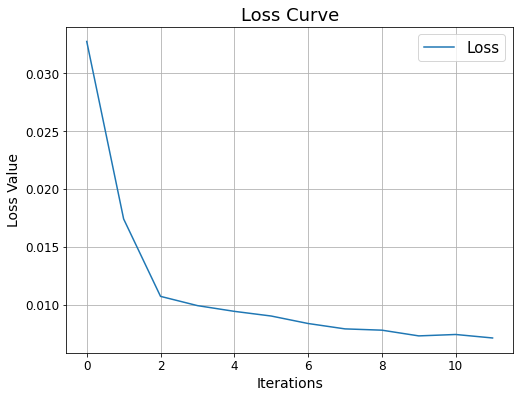

In [57]:
plt.figure(figsize = (8,6))
plt.title('Loss Curve', fontsize = 18)
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel('Loss Value', fontsize = 14)
plt.legend(['Loss'], fontsize = 15)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.show()

#### Prediciton on Training data

In [58]:
Y_pred_mlp1 = mlp.predict(X_train)
l = metric(Y_train,Y_pred_mlp1)

[[552743     79]
 [   384  45772]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      0.99      0.99     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 0.9992


### VOTING CLASSIFIER 

In [59]:
start = time.time()

estimators = []

# Adding the tuned decision tree model
tuned_decision1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 11, min_samples_leaf = 5, random_state = 10)
estimators.append(('Tuned Decision Tree',tuned_decision1))


# Adding the bagging model
bagging1 = ExtraTreesClassifier(n_estimators = 50, random_state = 10)
estimators.append(('Bagging',bagging1))


# Adding the AdaBoost model
adaboost1 = AdaBoostClassifier(base_estimator = ExtraTreesClassifier(n_estimators = 50, random_state = 10),
                                    n_estimators = 10,
                                    random_state = 10)
estimators.append(('Adaboost',adaboost1))


# create the ensemble model
ensemble = VotingClassifier(estimators, voting = 'soft')
ensemble.fit(X_train,Y_train)

end = time.time()
print('Execution Time is',round((end-start)/60,4),'mins')
execution_time.append(round((end-start)/60,4))

Execution Time is 6.067 mins


#### Prediction on Testing data 

In [60]:
Y_pred_vtc = ensemble.predict(X_test)
l = metric(Y_test, Y_pred_vtc)

j = 0
for i in result.columns:
    result.loc['Voting Classifier',i] = l[j]
    j += 1
    
prediction['Voting Classifier'] = Y_pred_vtc
pred1['Voting Classifier'] = ensemble.predict_proba(X_test)[:,1]

[[256680      0]
 [    10    301]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.97      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of Model : 1.0


#### Prediction on Training data

In [61]:
Y_pred_vtc1 = ensemble.predict(X_train)
l = metric(Y_train, Y_pred_vtc1)

[[552822      0]
 [     0  46156]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978


Accuracy of Model : 1.0


## AUC - ROC CURVE 
### Calculating fpr , tpr and auc value for every model

In [62]:
def AUC_value(value):
    fp = []
    tp = []
    auc_v = []

    for i in value.columns[1:]:
        f,t,z = roc_curve(value['Actual Values'], value[i])
        a = round(auc(f,t),6)
        fp.append(f)
        tp.append(t)
        auc_v.append(a)
        
    auc_v1 = [round(i*100,2) for i in auc_v]
    auc_v1 = list(map("{}%".format, auc_v1))
    return auc_v1,fp,tp

### Plotting the Curve

In [63]:
def plot(fp,tp,auc_val):

    plt.figure(figsize = (10,6))
    plt.title('AUC-ROC CURVE', fontsize = 18)
    #cl = list(pred1.columns[1:])

    #for i in range(len(cl)):
    #    la = cl[i]+' '+str(auc_val[i])
    #    plt.plot(fp[i],tp[i], label = la)

    
    plt.plot(fp[0],tp[0], label = str('Logistic Regression'+' '+str(auc_val[0])))
    plt.plot(fp[2],tp[2], label = str('Decision Tree'+' '+str(auc_val[2])))
    # plt.plot(fp[3],tp[3], label = str('Tuned Decision Tree'+' '+str(auc_val[3])))
    # plt.plot(fp[4],tp[4], label = str('Bagging'+' '+str(auc_val[4])))
    plt.plot(fp[5],tp[5], label = str('Ada Boost'+' '+str(auc_val[5])))
    # plt.plot(fp[6],tp[6], label au= str('ANN'+' '+str(auc_val[6])))
    # plt.plot(fp[7],tp[7], label = str('Voting Classifier'+' '+str(auc_val[7])))

    plt.plot([0,1],[0,1],'r--')

    plt.legend(loc = 0, fontsize = 13)
    plt.xlabel('False Positive Rate', fontsize = 14)
    plt.ylabel('True Positive Rate', fontsize = 14)

    plt.xticks(np.arange(0,1.1,0.1), fontsize = 12)
    plt.yticks(np.arange(0,1.1,0.1), fontsize = 12)

    plt.show()

### Plot based on probability estimates of positive class 

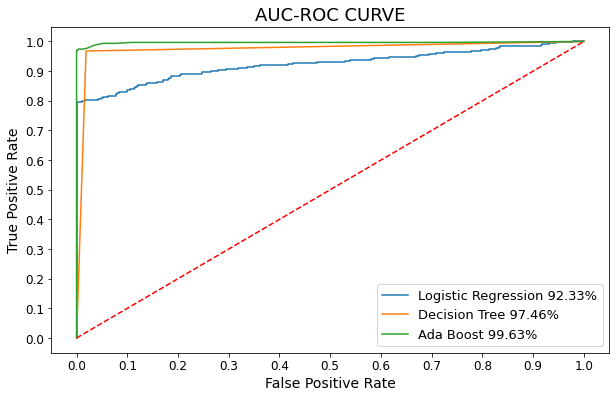

In [64]:
auc_value,fpr,tpr = AUC_value(pred1)
plot(fpr, tpr, auc_value)

### Plot based on predicted values

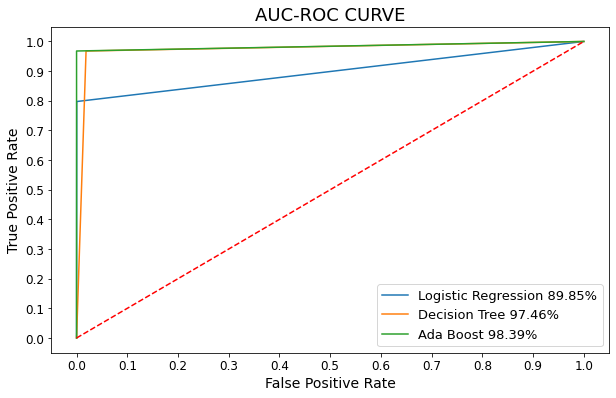

In [65]:
auc_value,fpr,tpr = AUC_value(prediction)
plot(fpr, tpr, auc_value)

## RESULTS OF DIFFERENT MODELS 
### Adding the AUC Value of Every Model

In [66]:
result['AUC Value'] = auc_value

### Formatting and Adding the Execution Time for every model

In [67]:
exec_time = list(map("{} mins".format, execution_time))
result['Execution Time'] = exec_time

In [68]:
result.head(8)

,Overall Accuracy,Precision Value,Recall Value,F1-Score,Type I Error,Type II Error,Total Error,AUC Value,Execution Time
Algorithm,,,,,,,,,
Logistic Regression,0.9994,0.7381,0.7974,0.7666,88,63,151,89.85%,0.2845 mins
Adjusted Logistic Regression,0.9996,0.8632,0.791,0.8255,39,65,104,89.54%,0.2845 mins
Decision Tree,0.9813,0.059,0.9678,0.1112,4802,10,4812,97.46%,0.6821 mins
Tuned Decision Tree,0.9999,0.9677,0.9646,0.9662,10,11,21,98.23%,0.4546 mins
Bagging,1,1,0.9646,0.982,0,11,11,98.23%,2.6946 mins
AdaBoost,1,1,0.9678,0.9837,0,10,10,98.39%,2.5288 mins
ANN MLP Classifier,1,0.9967,0.9646,0.9804,1,11,12,98.23%,1.6778 mins
Voting Classifier,1,1,0.9678,0.9837,0,10,10,98.39%,6.067 mins


In [69]:
# saving the results in csv format

path = 'Model_results.csv'
result.to_csv(path)

### Appending the predicted values to the Test data 
### on the basis of ADA BOOST which is the Final Model 

In [70]:
test2 = test1.copy()
test2.drop('default', axis = 1, inplace = True)
test2['Default'] = Y_pred_ada
test2['Default'] = test2['Default'].map({0 : 'No', 1 : "Yes"})

In [71]:
test2.head()

,loan_amount,term,interest_rate,emi,grade,emp_length,home_ownership,inc_borrower,verification_status,payment_plan,...,application_type,acc_now_delinq,total_collection,total_current_bal,first_credit_month,issue_date_month,credit_report_month,last_payment_date_month,next_payment_date_month,Default
id,,,,,,,,,,,,,,,,,,,,,
68587652,25000,36,5.32,752.87,0,1,0,150000.0,0,0,...,0,0,0.0,430856.0,2,12,1,1,2,No
66624733,18000,60,19.48,471.70,4,7,3,150000.0,0,0,...,0,0,60.0,36247.0,6,12,1,1,2,No
68446769,7000,36,7.49,217.72,0,10,0,59000.0,0,0,...,0,0,0.0,55222.0,10,12,1,0,2,No
68595206,20000,36,17.97,722.75,3,7,0,180000.0,0,0,...,0,0,418.0,277227.0,4,12,1,0,2,No
68587491,15000,36,6.99,463.09,0,2,0,93000.0,0,0,...,0,0,0.0,306430.0,10,12,1,0,2,No


In [72]:
# saving the output for test data in csv format

path = path = 'test_data_results.csv'
test2.to_csv(path)

## MONETARY ANALYSIS

In [73]:
# Keeping loan_amount, interest_rate & default variables
test1 = test1[['loan_amount','interest_rate','default']]

# Converting the Interest Rate to percentage
test1['interest_rate'] = test1['interest_rate']/100

test1.reset_index(inplace = True)
test1.head()

,id,loan_amount,interest_rate,default
0,68587652,25000,0.0532,0
1,66624733,18000,0.1948,0
2,68446769,7000,0.0749,0
3,68595206,20000,0.1797,0
4,68587491,15000,0.0699,0


In [74]:
# Appending the predictions of all the models to test1

test1 = pd.concat([test1,prediction.drop('Actual Values', axis = 1)], axis = 1)
test1.head()

,id,loan_amount,interest_rate,default,Logistic Regression,Adjusted Logistic Regression,Decision Tree,Tuned Decision Tree,Bagging,AdaBoost,ANN MLP Classifier,Voting Classifier
0,68587652,25000,0.0532,0,0,0,0,0,0,0,0,0
1,66624733,18000,0.1948,0,0,0,0,0,0,0,0,0
2,68446769,7000,0.0749,0,0,0,0,0,0,0,0,0
3,68595206,20000,0.1797,0,0,0,0,0,0,0,0,0
4,68587491,15000,0.0699,0,0,0,0,0,0,0,0,0


In [75]:
# Creating the dataframe to store the loss value

# Loss I  -> Loss due to Type I Error
# Loss II -> Loss due to Type II Error

loss = pd.DataFrame(columns = ['Algorithm','Loss I','Loss II'])

loss['Algorithm'] = ['Logistic Regression','Adjusted Logistic Regression', 'Decision Tree', 'Tuned Decision Tree',
                       'Bagging','AdaBoost','ANN MLP Classifier', 'Voting Classifier']

loss.set_index('Algorithm', inplace = True)

#loss.head(8)

### LOSS CALCULATION

#### For TYPE I Error it would be only the Interest that the bank will be getting, which would be a loss
#### For TYPE II Error it would be the Loan Amount

In [76]:
# TYPE I Error
# Actual value  -> 0
# Predict value -> 1  


# TYPE II Error
# Actual value  -> 1
# Predict value -> 0 


for i in loss.index:
    a = test1[test1['default'] != test1[i]].index
    
    loss1 = loss2 = 0
    for j in a:
        if test1.loc[j,'default'] == 0 and test1.loc[j,i] == 1:                # Calculation for TYPE I Error
            #print(test1.loc[j,'loan_amount'])
            loss1 += test1.loc[j,'loan_amount'] * test1.loc[j,'interest_rate']
        
        elif test1.loc[j,'default'] == 1 and test1.loc[j,i] == 0:              # Calculation for TYPE II Error
            loss2 += test1.loc[j,'loan_amount']*(1 + test1.loc[j,'interest_rate'])

    loss.loc[i,'Loss I'] = round(loss1,2)
    loss.loc[i,'Loss II'] = round(loss2,2)

    #print(round(loss1,2), round(loss2,2))    

In [77]:
loss['Total Loss'] = loss['Loss I'] + loss['Loss II']
loss.head(8)

,Loss I,Loss II,Total Loss
Algorithm,,,
Logistic Regression,507593,1.10853e+06,1.61612e+06
Adjusted Logistic Regression,228891,1.11283e+06,1.34172e+06
Decision Tree,2.55019e+07,120436,2.56223e+07
Tuned Decision Tree,1577.39,162432,164009
Bagging,0,137524,137524
AdaBoost,0,135386,135386
ANN MLP Classifier,299.7,173148,173448
Voting Classifier,0,135386,135386


In [78]:
# Saving the results in csv format

path = 'Monetary_Results.csv'
loss.to_csv(path)

## SAVING THE OBJECT'S IN A FILE 
### MODEL OBJECT

In [79]:
filename = 'model.sav'
dump(adaboost, open(filename, 'wb'))

### SCALER OBJECT  

In [80]:
filename = 'scaler.sav'
dump(scale, open(filename, 'wb'))

### To store Label Encoder object 
### First we need to store the column names which are categorical
### Second we need unique values of each categorical variables
### Third the label encoder object

### CATEGORICAL COLUMN NAMES 

In [81]:
filename = 'col.txt'
dump(col, open(filename, 'wb'))

### UNIQUE VALUES OF EACH CATEGORICAL COLUMN 

In [82]:
filename = 'uniquevalues.sav'
dump(unique_val, open(filename, 'wb'))

### LABEL ENCODER OBJECT

In [83]:
filename = 'labelencoder.sav'
dump(label_encd, open(filename, 'wb'))